## Fraud Detection Analysis - Task 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
# Add the parent directory to the system path 
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

In [3]:
from scripts.preprocess import *

In [4]:
# Data Loading 
fraud_data, ip_country, credit_card = load_datasets()

### Initial Data Inspection

In [5]:
# fraud data
print("\nFraud Data Info:")
get_data_info(fraud_data)
print("\nSample of Fraud Data:")
fraud_data.head()


Fraud Data Info:
Total rows: 151112
Total columns: 11
Data types:
{dtype('O'): 6, dtype('int64'): 4, dtype('float64'): 1}

Sample of Fraud Data:


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [6]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [7]:
# IP country data
print("\nIP Country Data Info:")
print(get_data_info(ip_country))
print("\nSample of IP Country Data:")
ip_country.head()


IP Country Data Info:
Total rows: 138846
Total columns: 3
Data types:
{dtype('float64'): 1, dtype('int64'): 1, dtype('O'): 1}
None

Sample of IP Country Data:


,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [8]:
ip_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [9]:
# credit card data 
print("\nCredit Card Data Info:")
print(get_data_info(credit_card))
print("\nSample of Credit Card Data:")
credit_card.head()


Credit Card Data Info:
Total rows: 284807
Total columns: 31
Data types:
{dtype('float64'): 30, dtype('int64'): 1}
None

Sample of Credit Card Data:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Missing Values Analysis

In [11]:
print("\nMissing values in Fraud Data:")
print(check_missing_values(fraud_data))
    
print("\nMissing values in IP Country Data:")
print(check_missing_values(ip_country))
    
print("\nMissing values in Credit Card Data:")
print(check_missing_values(credit_card))


Missing values in Fraud Data:
Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []

Missing values in IP Country Data:
Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []

Missing values in Credit Card Data:
Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []


### Duplicate Analysis

In [12]:
print("\nDuplicates in Fraud Data:")
print(check_duplicates(fraud_data))
    
print("\nDuplicates in IP Country Data:")
print(check_duplicates(ip_country))
    
print("\nDuplicates in Credit Card Data:")
print(check_duplicates(credit_card))


Duplicates in Fraud Data:
{'total_rows': 151112, 'duplicate_rows': np.int64(0), 'duplicate_percentage': np.float64(0.0)}

Duplicates in IP Country Data:
{'total_rows': 138846, 'duplicate_rows': np.int64(0), 'duplicate_percentage': np.float64(0.0)}

Duplicates in Credit Card Data:
{'total_rows': 284807, 'duplicate_rows': np.int64(1081), 'duplicate_percentage': np.float64(0.379555277784605)}


### Data Cleaning

In [13]:
# Handle missing values
fraud_data_cleaned = handle_missing_values(fraud_data)
ip_country_cleaned = handle_missing_values(ip_country)
credit_card_cleaned = handle_missing_values(credit_card)

In [14]:
# Remove duplicates and correct data types
fraud_data_cleaned = clean_data(fraud_data_cleaned)
ip_country_cleaned = clean_data(ip_country_cleaned)
credit_card_cleaned = clean_data(credit_card_cleaned)    

In [15]:
print("\nData shapes after cleaning:")
print(f"Fraud Data: {fraud_data_cleaned.shape}")
print(f"IP Country Data: {ip_country_cleaned.shape}")
print(f"Credit Card Data: {credit_card_cleaned.shape}")


Data shapes after cleaning:
Fraud Data: (151112, 11)
IP Country Data: (138846, 3)
Credit Card Data: (283726, 31)


 ### Merge Datasets for Geolocation Analysis

In [16]:
# Convert IP addresses to integers in fraud_data
fraud_data_cleaned['ip_int'] = fraud_data_cleaned['ip_address'].apply(lambda x: ip_to_int(str(int(x))) if pd.notna(x) else None)

# Convert IP address bounds in ip_country_cleaned to integers
ip_country_cleaned['lower_bound_ip_address'] = ip_country_cleaned['lower_bound_ip_address'].astype(int)
ip_country_cleaned['upper_bound_ip_address'] = ip_country_cleaned['upper_bound_ip_address'].astype(int)

# Sort the IP range dataset by the lower bound
ip_country_cleaned.sort_values('lower_bound_ip_address', inplace=True)

# Perform a merge based on the IP ranges
fraud_data_with_country = pd.merge_asof(
    fraud_data_cleaned.sort_values('ip_int'),  # Sort fraud data by 'ip_int'
    ip_country_cleaned[['lower_bound_ip_address', 'upper_bound_ip_address', 'country']],  # Select relevant columns
    left_on='ip_int',  # Match fraud data based on 'ip_int'
    right_on='lower_bound_ip_address',  # Match IP ranges from country data
    direction='backward',  # Match to the closest lower bound
)

# Filter the merged results where the 'ip_int' falls within the range of the IP bounds
fraud_data_with_country = fraud_data_with_country[
    (fraud_data_with_country['ip_int'] >= fraud_data_with_country['lower_bound_ip_address']) &
    (fraud_data_with_country['ip_int'] <= fraud_data_with_country['upper_bound_ip_address'])
]

# Drop unnecessary columns
fraud_data_with_country.drop(['lower_bound_ip_address', 'upper_bound_ip_address'], axis=1, inplace=True)

# Check the first few rows of the merged data
print(fraud_data_with_country.head())

     user_id         signup_time       purchase_time  purchase_value  \
634   247547 2015-06-28 03:00:34 2015-08-09 03:57:29              47   
635   220737 2015-01-28 14:21:11 2015-02-11 20:28:28              15   
636   390400 2015-03-19 20:49:09 2015-04-11 23:41:23              44   
637    69592 2015-02-24 06:11:57 2015-05-23 16:40:14              55   
638   174987 2015-07-07 12:58:11 2015-11-03 04:04:30              51   

         device_id  source browser sex  age    ip_address  class    ip_int  \
634  KIXYSVCHIPQBR     SEO  Safari   F   30  1.677886e+07      0  16778864   
635  PKYOWQKWGJNJI     SEO  Chrome   F   34  1.684205e+07      0  16842045   
636  LVCSXLISZHVUO     Ads      IE   M   29  1.684366e+07      0  16843656   
637  UHAUHNXXUADJE  Direct  Chrome   F   30  1.693873e+07      0  16938732   
638  XPGPMOHIDRMGE     SEO  Chrome   F   37  1.697198e+07      0  16971984   

       country  
634  Australia  
635   Thailand  
636      China  
637      China  
638   Thailan

In [17]:
print("\nShape after merging:", fraud_data_with_country.shape)
print("\nSample of merged data:")
fraud_data_with_country.head()


Shape after merging: (129146, 13)

Sample of merged data:


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,ip_int,country
634,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,47,KIXYSVCHIPQBR,SEO,Safari,F,30,1.677886e+07,0,16778864,Australia
635,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,15,PKYOWQKWGJNJI,SEO,Chrome,F,34,1.684205e+07,0,16842045,Thailand
636,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,44,LVCSXLISZHVUO,Ads,IE,M,29,1.684366e+07,0,16843656,China
637,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,55,UHAUHNXXUADJE,Direct,Chrome,F,30,1.693873e+07,0,16938732,China
638,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,51,XPGPMOHIDRMGE,SEO,Chrome,F,37,1.697198e+07,0,16971984,Thailand


### Feature Engineering

In [18]:
# Create time-based features
fraud_data_featured = create_time_features(fraud_data_with_country)

In [19]:
fraud_data_featured.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,ip_int,country,hour_of_day,day_of_week,month,is_weekend,time_to_purchase
634,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,47,KIXYSVCHIPQBR,SEO,Safari,F,30,1.677886e+07,0,16778864,Australia,3,6,8,1,3632215.0
635,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,15,PKYOWQKWGJNJI,SEO,Chrome,F,34,1.684205e+07,0,16842045,Thailand,20,2,2,0,1231637.0
636,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,44,LVCSXLISZHVUO,Ads,IE,M,29,1.684366e+07,0,16843656,China,23,5,4,1,1997534.0
637,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,55,UHAUHNXXUADJE,Direct,Chrome,F,30,1.693873e+07,0,16938732,China,16,5,5,1,7640897.0
638,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,51,XPGPMOHIDRMGE,SEO,Chrome,F,37,1.697198e+07,0,16971984,Thailand,4,1,11,0,10249579.0


In [20]:
 # Calculate transaction-based features
fraud_data_featured = calculate_transaction_features(fraud_data_featured)

In [21]:
fraud_data_featured.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,...,country,hour_of_day,day_of_week,month,is_weekend,time_to_purchase,transaction_count,user_activity_period_days,transaction_velocity,avg_purchase_value
0,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,47,KIXYSVCHIPQBR,SEO,Safari,F,30,1.677886e+07,...,Australia,3,6,8,1,3632215.0,1,0.0,1.0,47.0
1,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,15,PKYOWQKWGJNJI,SEO,Chrome,F,34,1.684205e+07,...,Thailand,20,2,2,0,1231637.0,1,0.0,1.0,15.0
2,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,44,LVCSXLISZHVUO,Ads,IE,M,29,1.684366e+07,...,China,23,5,4,1,1997534.0,1,0.0,1.0,44.0
3,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,55,UHAUHNXXUADJE,Direct,Chrome,F,30,1.693873e+07,...,China,16,5,5,1,7640897.0,1,0.0,1.0,55.0
4,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,51,XPGPMOHIDRMGE,SEO,Chrome,F,37,1.697198e+07,...,Thailand,4,1,11,0,10249579.0,1,0.0,1.0,51.0


In [22]:
print("\nNew features created:")
new_features = set(fraud_data_featured.columns) - set(fraud_data_with_country.columns)
new_features


New features created:


{'avg_purchase_value',
 'day_of_week',
 'hour_of_day',
 'is_weekend',
 'month',
 'time_to_purchase',
 'transaction_count',
 'transaction_velocity',
 'user_activity_period_days'}

### Exploratory Data Analysis

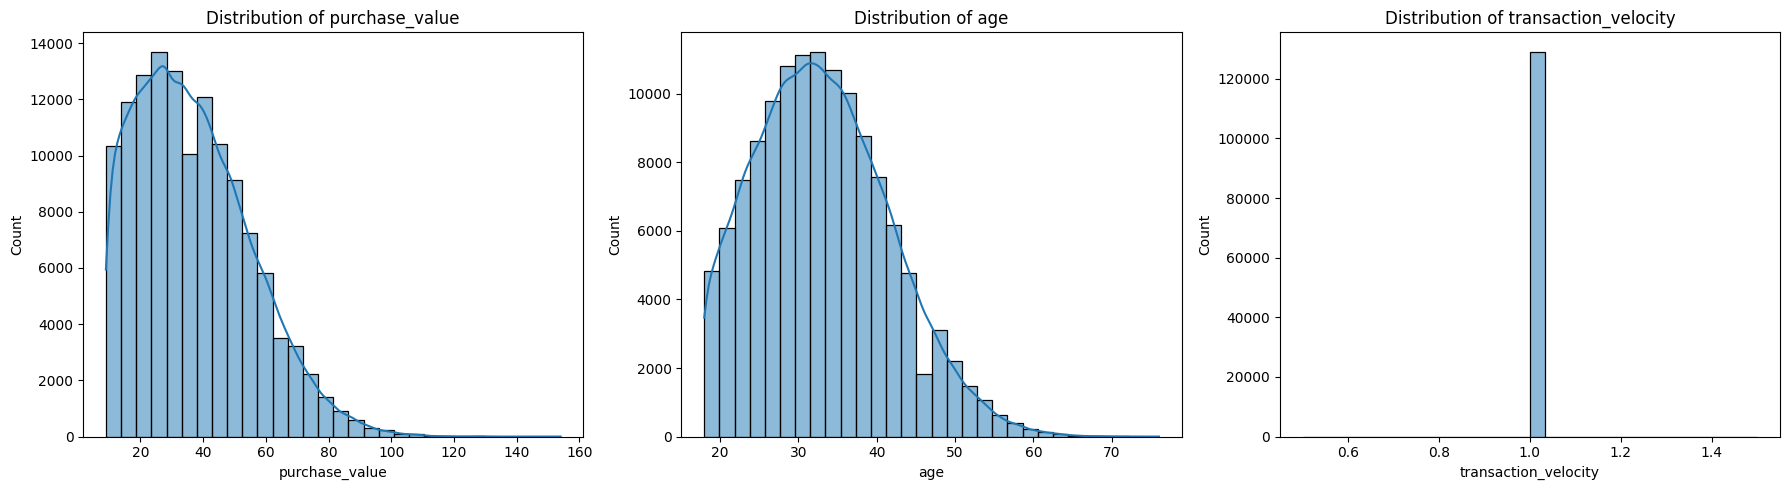

In [23]:
# Univariate Analysis - Histograms for Numeric Variables
numeric_columns = ['purchase_value', 'age', 'transaction_velocity']

fig, axes = plt.subplots(1, len(numeric_columns), figsize=(18, 5))
for i, col in enumerate(numeric_columns):
    if col in fraud_data_featured.columns:
        sns.histplot(fraud_data_featured[col], kde=True, bins=30, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

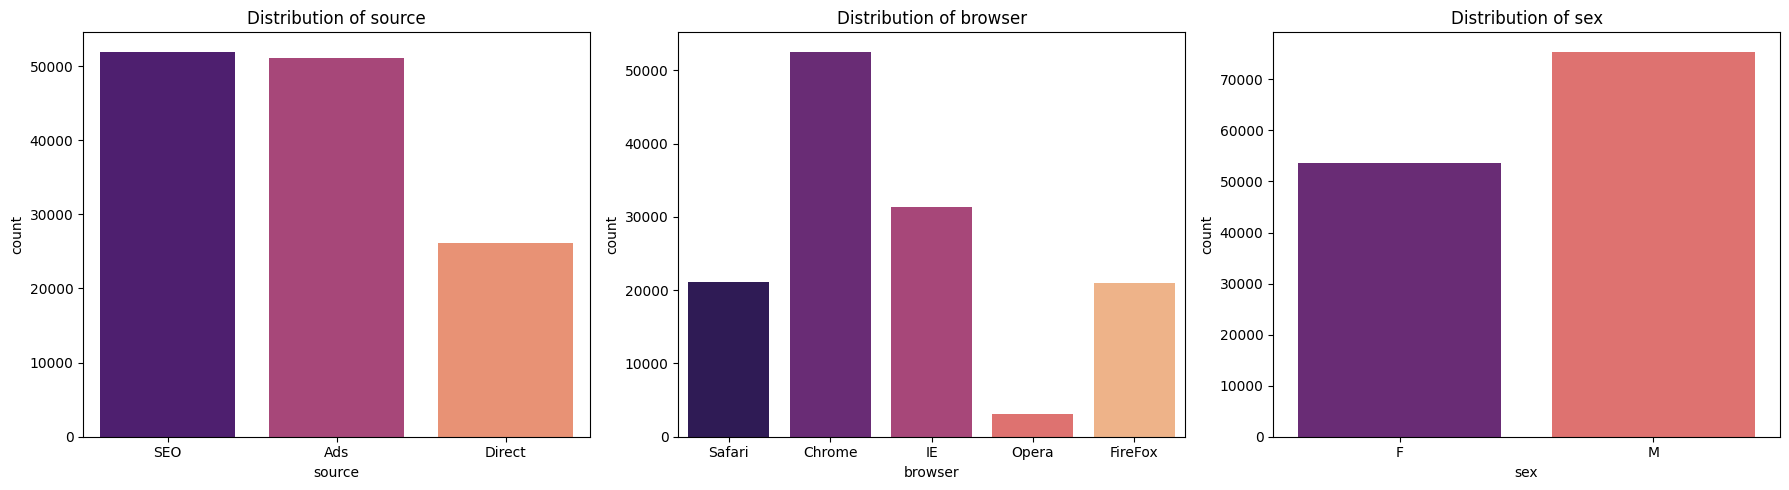

In [24]:
# Bar plots for Categorical Variables
categorical_columns = ['source', 'browser', 'sex']

fig, axes = plt.subplots(1, len(categorical_columns), figsize=(18, 5))
for i, col in enumerate(categorical_columns):
    if col in fraud_data_featured.columns:
        sns.countplot(data=fraud_data_featured, x=col, ax=axes[i], hue=col, legend=False, palette='magma')
        axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [25]:
# Distribution analysis of key features
key_features = ['purchase_value', 'age', 'hour_of_day', 'transaction_velocity']
for feature in key_features:
    if feature in fraud_data_featured.columns:
        print(f"\nAnalyzing distribution of {feature}...")
        plot_distribution(fraud_data_featured, feature)


Analyzing distribution of purchase_value...



Analyzing distribution of age...



Analyzing distribution of hour_of_day...



Analyzing distribution of transaction_velocity...


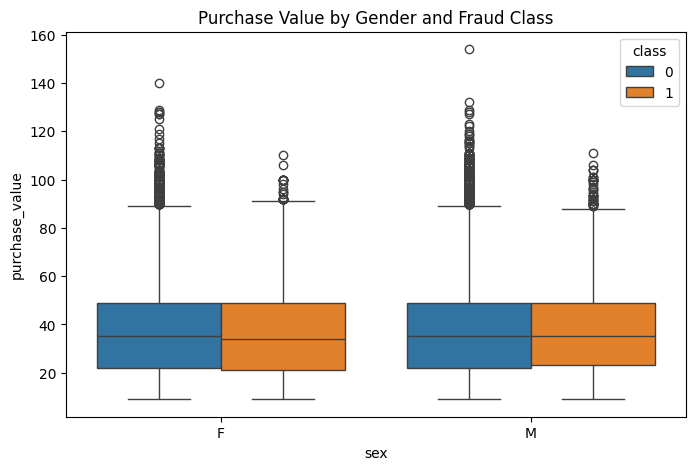

In [26]:

# Bivariate Analysis - Boxplot for Fraud and Purchase Value by Gender
plt.figure(figsize=(8, 5))
sns.boxplot(x='sex', y='purchase_value', hue='class', data=fraud_data_featured)
plt.title('Purchase Value by Gender and Fraud Class')
plt.show()


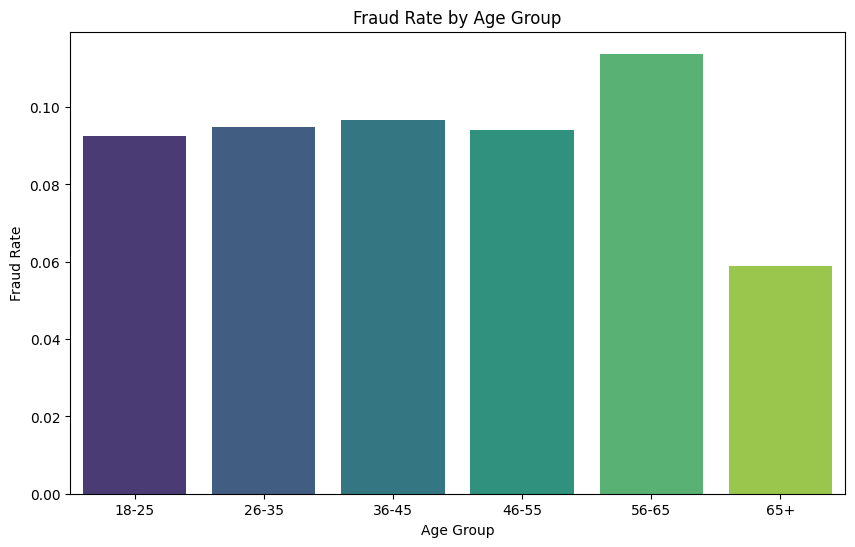

In [27]:
# Demographic Segmentation - Age Groups
fraud_data_featured['age_group'] = pd.cut(fraud_data_featured['age'], bins=[18, 25, 35, 45, 55, 65, 100], labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+'])

# Fraud Rate by Age Group
age_fraud = fraud_data_featured.groupby('age_group', observed=False)['class'].mean().reset_index()

# Plot Fraud Rate by Age Group
plt.figure(figsize=(10,6))
sns.barplot(data=age_fraud, x='age_group', y='class', hue='age_group', palette='viridis', legend=False)
plt.title('Fraud Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Fraud Rate')
plt.show()

In [28]:
# Plot correlation matrix for numeric features
print("\nGenerating correlation matrix...")
plot_correlation_matrix(fraud_data_featured)


Generating correlation matrix...


### Multivariate Analysis

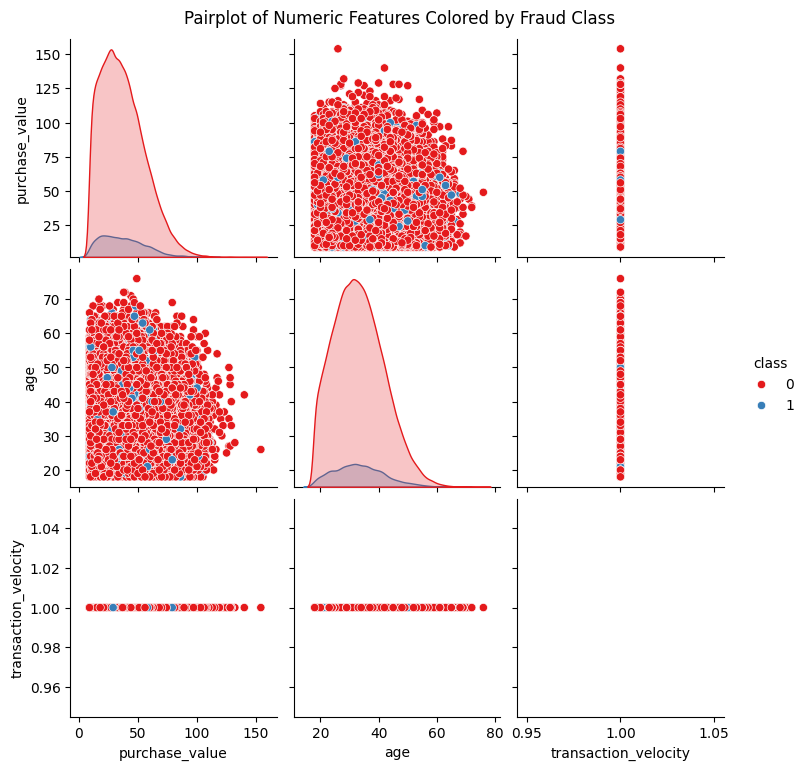

In [29]:
# Pairplot
sns.pairplot(fraud_data_featured, vars=['purchase_value', 'age', 'transaction_velocity'], hue='class', palette='Set1')
plt.suptitle('Pairplot of Numeric Features Colored by Fraud Class', y=1.02)
plt.show()

### Time Series Analysis 

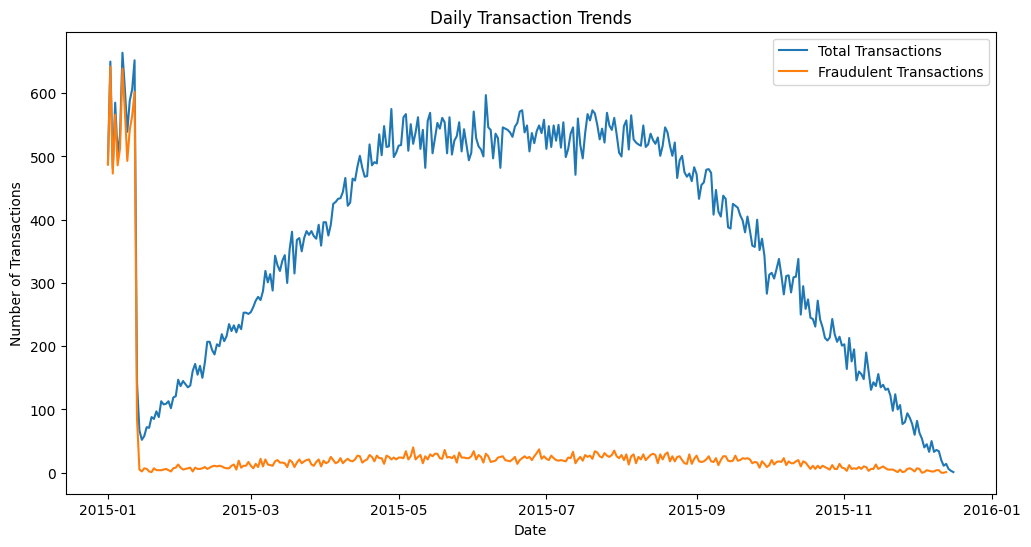

In [30]:
# Set 'purchase_time' as the index
fraud_data_featured.set_index('purchase_time', inplace=True)

# Resample data by day
daily_transactions = fraud_data_featured.resample('D').size()
daily_frauds = fraud_data_featured[fraud_data_featured['class'] == 1].resample('D').size()

# Plot Transaction Trends
plt.figure(figsize=(12,6))
plt.plot(daily_transactions, label='Total Transactions')
plt.plot(daily_frauds, label='Fraudulent Transactions')
plt.title('Daily Transaction Trends')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.legend()
plt.show()

# Reset index for further analyses
fraud_data_featured.reset_index(inplace=True)

### Geographical Analysis

In [ ]:
# Fraud Rate by Country
country_fraud = fraud_data_featured.groupby('country')['class'].mean().reset_index()

# Plotting on a World Map using Plotly
fig = px.choropleth(country_fraud, locations='country',
                    locationmode='country names',
                    color='class',
                    hover_name='country',
                    color_continuous_scale='Reds',
                    title='Fraud Rate by Country')
fig.show()

### Feature Encoding and Normalization

In [32]:
# Encode categorical features
fraud_data_encoded = encode_categorical_features(fraud_data_featured)
credit_card_encoded = encode_categorical_features(credit_card_cleaned)

In [33]:
# Normalize features
fraud_data_final = normalize_features(fraud_data_encoded)
credit_card_final = normalize_features(credit_card_encoded)

In [34]:
fraud_data_final.head()

,purchase_time,user_id,signup_time,purchase_value,device_id,age,ip_address,class,ip_int,hour_of_day,...,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Viet Nam,country_Virgin Islands (U.S.),country_Yemen,country_Zambia,country_Zimbabwe
0,2015-08-09 03:57:29,247547,2015-06-28 03:00:34,0.549607,KIXYSVCHIPQBR,-0.363124,-1.728724,0,-1.728724,-1.231124,...,False,False,False,False,False,False,False,False,False,False
1,2015-02-11 20:28:28,220737,2015-01-28 14:21:11,-1.197335,PKYOWQKWGJNJI,0.101168,-1.728666,0,-1.728666,1.229002,...,False,False,False,False,False,False,False,False,False,False
2,2015-04-11 23:41:23,390400,2015-03-19 20:49:09,0.385831,LVCSXLISZHVUO,-0.479197,-1.728664,0,-1.728664,1.663142,...,False,False,False,False,False,False,False,False,False,False
3,2015-05-23 16:40:14,69592,2015-02-24 06:11:57,0.986342,UHAUHNXXUADJE,-0.363124,-1.728577,0,-1.728577,0.650149,...,False,False,False,False,False,False,False,False,False,False
4,2015-11-03 04:04:30,174987,2015-07-07 12:58:11,0.767974,XPGPMOHIDRMGE,0.449387,-1.728546,0,-1.728546,-1.086411,...,False,False,False,False,False,False,False,False,False,False


In [35]:
credit_card_final.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996823,-0.701082,-0.041687,1.680101,0.976623,-0.247020,0.348012,0.193700,0.084434,0.333534,...,-0.024777,0.383483,-0.177444,0.110157,0.247059,-0.392622,0.333033,-0.065850,0.244200,0
1,-1.996823,0.608792,0.164138,0.109279,0.318998,0.042258,-0.060980,-0.065656,0.072903,-0.231703,...,-0.311372,-0.881454,0.162081,-0.561503,0.321175,0.260854,-0.027154,0.043219,-0.342584,0
2,-1.996802,-0.700336,-0.811337,1.174270,0.270648,-0.366756,1.352655,0.643223,0.210788,-1.381169,...,0.343094,1.065068,1.457772,-1.138484,-0.628161,-0.288861,-0.144325,-0.183824,1.158900,0
3,-1.996802,-0.499064,-0.109972,1.187383,-0.608355,-0.008814,0.937245,0.192079,0.320843,-1.264664,...,-0.149093,0.007299,-0.305465,-1.941446,1.242487,-0.460694,0.154039,0.185687,0.139886,0
4,-1.996781,-0.597606,0.535539,1.025470,0.287092,-0.297036,0.072873,0.481517,-0.228725,0.747917,...,-0.012516,1.101780,-0.220709,0.232904,-0.394800,1.041677,0.550001,0.654234,-0.073813,0


In [36]:
print("\nFinal shapes:")
print(f"Fraud Data: {fraud_data_final.shape}")
print(f"Credit Card Data: {credit_card_final.shape}")


Final shapes:
Fraud Data: (129146, 206)
Credit Card Data: (283726, 31)


In [37]:
# Save Processed Data
    
fraud_data_final.to_csv('../data/processed/processed_fraud_data.csv', index=False)
credit_card_final.to_csv('../data/processed/processed_credit_card.csv', index=False)